I am looking to merge two datasets, one containing salary information of NFL players and the other containing statistics from their 2022-23 season. First, I need to import them and then reduce the statistics dataset down to include only stats from the most recent NFL season.

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('football_salaries.csv')
df2 = pd.read_csv('yearlyNFL.csv')

df2 = df2[df2['season']==2022]


Now that I have the two datasets I want to merge, my goal is to merge them by the player's name. I then want perform any data cleaning necessary to begin my statistical analysis.

In [ ]:
merge_df = df1.merge(df2, left_on='player', right_on='name', how='inner')
merge_df['age'] = merge_df['age'].replace([0,2020],np.nan)
merge_df = merge_df.drop(columns=[
    'position_x',
    'team_x',
    'name',
    'season_type',
    'fantasy_points',
    'fantasy_points_ppr',
    'ht'])
merge_df = merge_df.drop([7,8,9])
merge_df = merge_df.rename(columns={'position_y':'position','team_y':'team'})
merge_df


,player,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency,id,position,team,...,ppr_ppg,ypg,pr,rookie_season,round,overall,wt,forty,vertical,years_played
0,Travis Kelce,30.0,46842000,9368400,20017000,10517000,2022 UFA,1655,TE,KC,...,18.605882,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zach Ertz,29.0,42500000,8500000,20000000,13318527,2022 Void,1755,TE,ARI,...,11.560000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kyle Rudolph,30.0,36500000,7300000,18500000,12640000,2020 UFA,1103,TE,TB,...,2.360000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cameron Brate,28.0,40800000,6800000,18000000,7000000,2024 UFA,241,TE,TB,...,4.155556,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Kroft,27.0,18750000,6250000,9800000,6300000,2022 UFA,1707,TE,SF,...,2.425000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,C.J. Board,26.0,1080000,540000,0,0,2021 ERFA,224,WR,TEN,...,1.600000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,Keith Kirkwood,25.0,1050000,525000,0,0,2020 ERFA,1029,WR,NO,...,1.266667,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,Zach Pascal,25.0,1050000,525000,0,0,2020 ERFA,1759,WR,PHI,...,3.000000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,River Cracraft,25.0,1050000,525000,0,0,2020 ERFA,1434,WR,MIA,...,3.900000,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The final merged dataset has incorrect ages replaced with missing values, seven dropped columns, corrected an error where "Josh Allen" was repeated four times, and two renamed columns. Now I want to conduct some exploratory data analysis. First, I'm interested in the distribution of offensive skill position players.

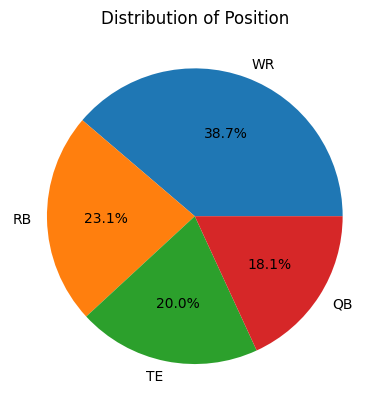

In [ ]:
import matplotlib.pyplot as plt

position_counts = merge_df['position'].value_counts()

plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%")
plt.title('Distribution of Position')
plt.show()

I now want to see if contract value increases or decreases as a player gets older, so I need a graph to visualize this.

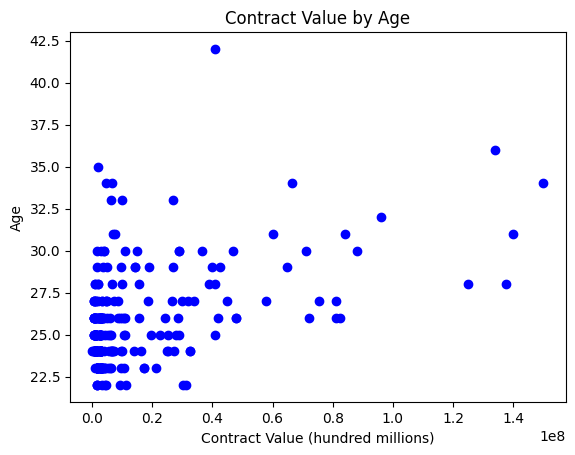

In [ ]:
plt.plot(merge_df['total_value'],merge_df['age'],'bo')
plt.title('Contract Value by Age')
plt.xlabel('Contract Value (hundred millions)')
plt.ylabel('Age')
plt.show()

I'm interested in visualizing the distributions of each individual position from the merged dataset. I want to create a chart that will show the contract values for these positions.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seabor

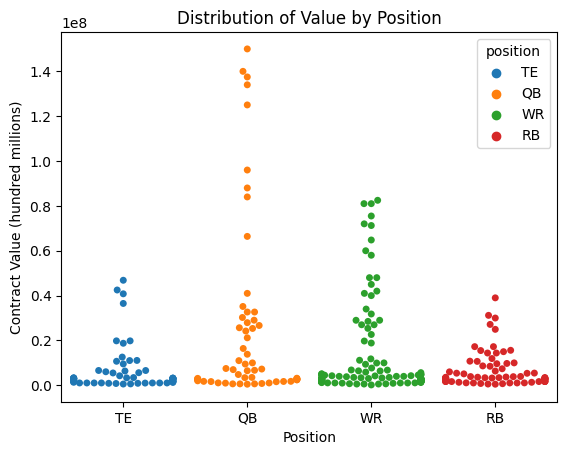

In [ ]:
import seaborn as sns

sns.swarmplot(x=merge_df['position'],y=merge_df['total_value'],hue=merge_df['position'])
plt.title('Distribution of Value by Position')
plt.xlabel('Position')
plt.ylabel('Contract Value (hundred millions)')
plt.show()

After this EDA, I want to perform a simple linear regression on four separate variables from the merged dataset: total_yards, carries, offense_snaps, and total_tds. I then want to see the coefficients for the models and see what the graph of each regression looks like. Finally, I want to create a similar visualization to the one above, but just for running backs.

LinregressResult(slope=1.62916990785451e-05, intercept=433.0240215399054, rvalue=0.2304018302697052, pvalue=0.04827878609847857, stderr=8.109044880900487e-06, intercept_stderr=83.42938000440942)
LinregressResult(slope=2.792468376165385e-06, intercept=70.4306859983698, rvalue=0.23001272162810588, pvalue=0.0486691710759389, stderr=1.3924087222460509e-06, intercept_stderr=14.325706432249989)
LinregressResult(slope=8.29204337881092e-06, intercept=229.28026654174056, rvalue=0.2583529982388146, pvalue=0.026251019703768856, stderr=3.6541105145813574e-06, intercept_stderr=37.59507798719474)


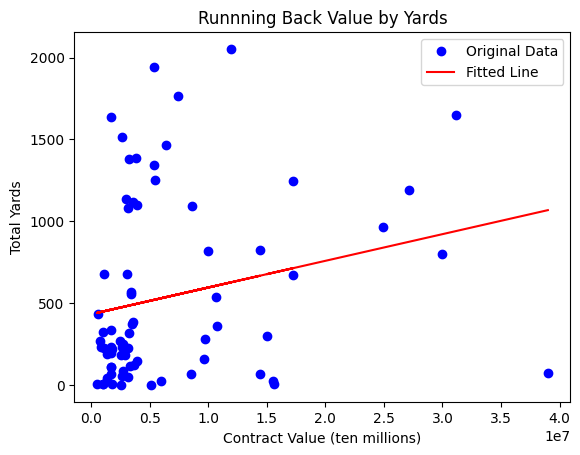

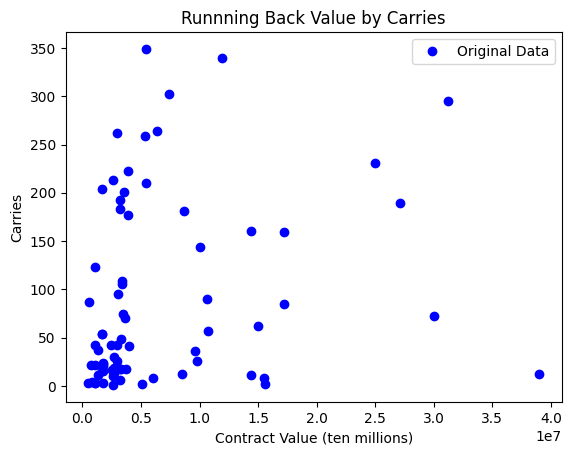

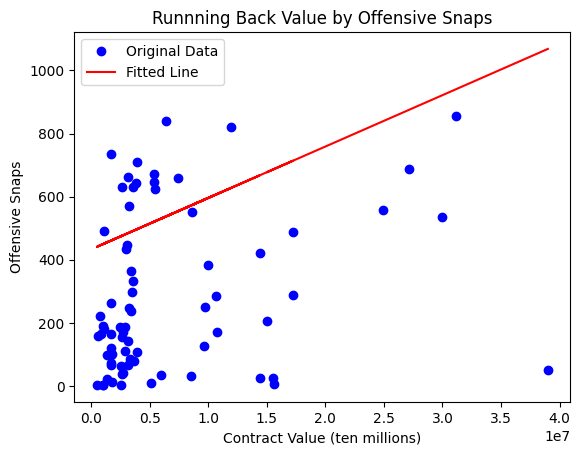

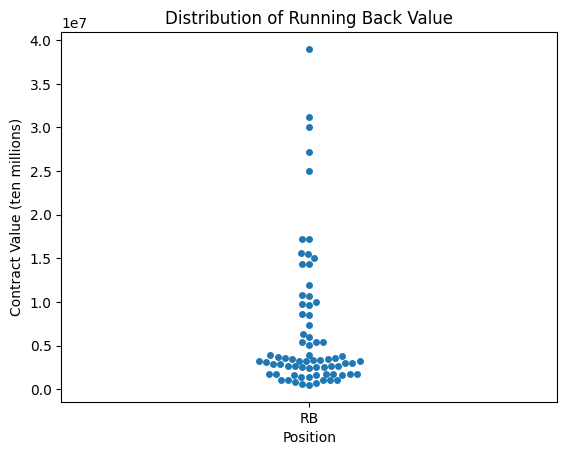

In [ ]:
import scipy.stats as stats

stat_df = merge_df[merge_df['position']=='RB']
stat_df

x = stat_df['total_value']
y = stat_df['total_yards']
y1 = stat_df['carries']
y2 = stat_df['offense_snaps']
y3 = stat_df['total_tds']

model = stats.linregress(x,y)
model1 = stats.linregress(x,y1)
model2 = stats.linregress(x,y2)
model3 = stats.linregress(x,y3)

print(model)
print(model1)
print(model2)

plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x, model.intercept + model.slope*x, 'r', label='Fitted Line')
plt.title('Runnning Back Value by Yards')
plt.xlabel('Contract Value (ten millions)')
plt.ylabel('Total Yards')
plt.legend()
plt.show()

plt.plot(x, y1, 'bo', label='Original Data')
plt.title('Runnning Back Value by Carries')
plt.xlabel('Contract Value (ten millions)')
plt.ylabel('Carries')
plt.legend()
plt.show()

plt.plot(x, y2, 'bo', label='Original Data')
plt.plot(x, model.intercept + model.slope*x, 'r', label='Fitted Line')
plt.title('Runnning Back Value by Offensive Snaps')
plt.xlabel('Contract Value (ten millions)')
plt.ylabel('Offensive Snaps')
plt.legend()
plt.show()

sns.swarmplot(x=stat_df['position'],y=stat_df['total_value'])
plt.title('Distribution of Running Back Value')
plt.xlabel('Position')
plt.ylabel('Contract Value (ten millions)')
plt.show()



Now I have all of the necessary graphs and regression equations that I need to write my report.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ab63d15-d15b-42c7-9366-302c345d8a8a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>